In [ ]:
import re
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader
import nltk
import string

In [ ]:
import pandas as pd
data = pd.read_json('dataset/arabic_train.jsonl', lines=True)
data.head()

,id,url,title,summary,text
0,140323_russian_troops_crimea_naval_base,https://www.bbc.com/arabic/worldnews/2014/03/1...,القوات الأوكرانية تبدأ الانسحاب من القرم,بدأت القوات الأوكرانية الانسحاب من شبه جزيرة ا...,وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينو...
1,130528_egypt_nile_dam,https://www.bbc.com/arabic/middleeast/2013/05/...,هل يفرض سد النهضة الإثيوبي واقعا جديدا على مصر؟,"""هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني...",بحلول عام 2050 ستحتاج مصر إلى 21 مليار متر مكع...
2,world-47242349,https://www.bbc.com/arabic/world-47242349,تعرف على منطقة كشمير التي تسببت بحربين بين اله...,قالت الشرطة في القطاع الهندي من إقليم كشمير إن...,وذكرت وكالة الأنباء المحلية (جي.إن.إس) أن جماع...
3,vert-cul-55078328,https://www.bbc.com/arabic/vert-cul-55078328,ماذا تعرف عن العالم الخفي للمعابد اليابانية ال...,في عام 816، تجول راهب يدعى كوكاي، في المنحدرات...,ووقع اختياره على واد عمقه 800 متر محاط بثماني ...
4,141023_yemen_hodeida,https://www.bbc.com/arabic/middleeast/2014/10/...,"اشتباك بين الحوثيين و""الحراك التهامي"" في الحدي...","أكد مصدر في ""الحراك التهامي"" لأبناء محافظة الح...",مسلح حوثي في إب وقال المصدر إن المسلحين الحوثي...


In [ ]:
data.describe()

,id,url,title,summary,text
count,37519,37519,37519,37519,37519
unique,37519,37519,37493,37440,37425
top,140323_russian_troops_crimea_naval_base,https://www.bbc.com/arabic/worldnews/2014/03/1...,خمس حقائق لا تعرفها عن هيلاري كلينتون,نعرض عليكم أكثر القضايا التي تداولها مستخدمو م...,برنامج #بي_بي_سي_ترندينغ: يمكنكم مشاهدة الحلقا...
freq,1,1,2,15,61


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37519 entries, 0 to 37518
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       37519 non-null  object
 1   url      37519 non-null  object
 2   title    37519 non-null  object
 3   summary  37519 non-null  object
 4   text     37519 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [ ]:
data.shape

(37519, 5)

In [ ]:
data.summary

0        بدأت القوات الأوكرانية الانسحاب من شبه جزيرة ا...
1        "هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني...
2        قالت الشرطة في القطاع الهندي من إقليم كشمير إن...
3        في عام 816، تجول راهب يدعى كوكاي، في المنحدرات...
4        أكد مصدر في "الحراك التهامي" لأبناء محافظة الح...
                               ...                        
37514                             *هذا الفيديو بدون تعليق*
37515                         بي بي سي ترند تقرير مي نعمان
37516                                      تداعيات متواصلة
37517                                           حملة شامتة
37518                             *هذا الفيديو بدون تعليق*
Name: summary, Length: 37519, dtype: object

In [ ]:
with open('dataset/arabic.txt', 'r', encoding='utf-8') as file:
    stop_words = [line.strip() for line in file]

In [ ]:


# Remove stopwords from Arabic text
def remove_stopwords(text):
#    stop_words = set(stopwords.words('arabic'))  # Get the list of Arabic stopwords
    tokens = text.split()  # Tokenize the text into words
    filtered_tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    filtered_text = ' '.join(filtered_tokens)  # Rejoin the filtered tokens into a single string
    return filtered_text

# Assuming you have a DataFrame named 'df' with a column named 'text'
data['summary_processed'] = data['summary'].apply(remove_stopwords)


In [ ]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def punctuationsRemoval(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), " ",text)
    return text


In [ ]:
data["summary_processed"] = data["summary_processed"].apply(punctuationsRemoval)
data.head()

,id,url,title,summary,text,summary_processed
0,140323_russian_troops_crimea_naval_base,https://www.bbc.com/arabic/worldnews/2014/03/1...,القوات الأوكرانية تبدأ الانسحاب من القرم,بدأت القوات الأوكرانية الانسحاب من شبه جزيرة ا...,وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينو...,بدأت القوات الأوكرانية الانسحاب شبه جزيرة القرم
1,130528_egypt_nile_dam,https://www.bbc.com/arabic/middleeast/2013/05/...,هل يفرض سد النهضة الإثيوبي واقعا جديدا على مصر؟,"""هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني...",بحلول عام 2050 ستحتاج مصر إلى 21 مليار متر مكع...,هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني...
2,world-47242349,https://www.bbc.com/arabic/world-47242349,تعرف على منطقة كشمير التي تسببت بحربين بين اله...,قالت الشرطة في القطاع الهندي من إقليم كشمير إن...,وذكرت وكالة الأنباء المحلية (جي.إن.إس) أن جماع...,قالت الشرطة القطاع الهندي إقليم كشمير إن انفجا...
3,vert-cul-55078328,https://www.bbc.com/arabic/vert-cul-55078328,ماذا تعرف عن العالم الخفي للمعابد اليابانية ال...,في عام 816، تجول راهب يدعى كوكاي، في المنحدرات...,ووقع اختياره على واد عمقه 800 متر محاط بثماني ...,816، تجول راهب يدعى كوكاي، المنحدرات كثيفة الأ...
4,141023_yemen_hodeida,https://www.bbc.com/arabic/middleeast/2014/10/...,"اشتباك بين الحوثيين و""الحراك التهامي"" في الحدي...","أكد مصدر في ""الحراك التهامي"" لأبناء محافظة الح...",مسلح حوثي في إب وقال المصدر إن المسلحين الحوثي...,أكد مصدر الحراك التهامي لأبناء محافظة الحديد...


In [ ]:
# Tokenize text in a DataFrame column
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)  # Tokenize the text into words
    return tokens



data['tokens'] = data['summary_processed'].apply(tokenize_text)

In [ ]:
data["tokens"]

0        [بدأت, القوات, الأوكرانية, الانسحاب, شبه, جزير...
1        [هل, سيتم, تغيير, العبارة, الشهيرة, للمؤرخ, ال...
2        [قالت, الشرطة, القطاع, الهندي, إقليم, كشمير, إ...
3        [816،, تجول, راهب, يدعى, كوكاي،, المنحدرات, كث...
4        [أكد, مصدر, الحراك, التهامي, لأبناء, محافظة, ا...
                               ...                        
37514                          [هذا, الفيديو, بدون, تعليق]
37515                 [بي, بي, سي, ترند, تقرير, مي, نعمان]
37516                                   [تداعيات, متواصلة]
37517                                        [حملة, شامتة]
37518                          [هذا, الفيديو, بدون, تعليق]
Name: tokens, Length: 37519, dtype: object

In [ ]:
search_keyword = 'السيسي'

# Search for the keyword in the lists
search_results = data['tokens'].apply(lambda x: search_keyword in x)
search_results.value_counts()

False    37375
True       144
Name: tokens, dtype: int64

In [ ]:
val_data = pd.read_json("validation_dataset/labeled_validation_dataset.jsonl", lines=True)
val_data.head()

,example_id,paragraph,summary
0,0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...
1,1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...
2,2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...
3,3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...
4,4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...


In [ ]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)  # Tokenize the text into words
    return tokens



val_data['tokens'] = val_data['paragraph'].apply(tokenize_text)

In [ ]:
val_data.head()

,example_id,paragraph,summary,tokens
0,0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...,"[وتحت, عنوان, من, الكارثة, إلى, التحدى, يبدأ, ..."
1,1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...,"[ولم, يعترف, دبلوماسيو, هاتين, الدولتين, بالعر..."
2,2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...,"[قامت, ولاية, حلب, بعد, اعلان, الجنرال, الفرنس..."
3,3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...,"[دولة, مصر, العربيه, هي, ليست, اي, دوله, وليست..."
4,4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...,"[السوريون, يصرون, على, استقلال, بلادهم, :, و, ..."


In [ ]:
search_keyword = 'حرب'

# Search for the keyword in the lists
search_results = val_data['tokens'].apply(lambda x: search_keyword in x)
search_results.value_counts()

False    133
True      21
Name: tokens, dtype: int64

In [ ]:
from wordcloud import WordCloud

In [ ]:


data["summary_processed"] = data["summary_processed"].apply(punctuationsRemoval)
data.head()

#Word Cloud
def word_cloud_imshow(df):
    text = ''
    for news in df.paragraph:
        text += f" {news}"
    # Reshape and reverse the Arabic text for proper display
    reshaped_text = arabic_reshaper.reshape(text)
    reversed_text = get_display(reshaped_text)
    wordcloud = WordCloud(font_path='path_to_arabic_font.ttf').generate(reversed_text)

    # Display the word cloud using matplotlib
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    del text

In [ ]:
# Tokenize the Arabic paragraphs into words



In [ ]:
val_data['clean_text'] = val_data['paragraph'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
val_data.head()

,example_id,paragraph,summary,tokens,paragraph_processed,keywords,clean_text
0,0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...,"[وتحت, عنوان, من, الكارثة, إلى, التحدى, يبدأ, ...",وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,"[وتحت, عنوان, من, الكارثة, إلى, التحدى, يبدأ, ...",وتحت عنوان الكارثة التحدى يبدأ الكاتب عرض الكت...
1,1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...,"[ولم, يعترف, دبلوماسيو, هاتين, الدولتين, بالعر...",ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,"[ولم, يعترف, دبلوماسيو, هاتين, الدولتين, بالعر...",يعترف دبلوماسيو هاتين الدولتين بالعريضة وقعها ...
2,2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...,"[قامت, ولاية, حلب, بعد, اعلان, الجنرال, الفرنس...",قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,"[قامت, ولاية, حلب, بعد, اعلان, الجنرال, الفرنس...",قامت ولاية حلب اعلان الجنرال الفرنسي هنري غورو...
3,3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...,"[دولة, مصر, العربيه, هي, ليست, اي, دوله, وليست...",دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,"[دولة, مصر, العربيه, هي, ليست, اي, دوله, وليست...",دولة مصر العربيه ليست دوله وليست شعب لابل مصرا...
4,4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...,"[السوريون, يصرون, على, استقلال, بلادهم, :, و, ...",السوريون يصرون على استقلال بلادهم و مثلما رف...,"[السوريون, يصرون, على, استقلال, بلادهم, :, و, ...",السوريون يصرون استقلال بلادهم : مثلما رفض السو...


In [ ]:
val_data.head()

,example_id,paragraph,summary,tokens,paragraph_processed,keywords,clean_text
0,0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...,"[وتحت, عنوان, من, الكارثة, إلى, التحدى, يبدأ, ...",وتحت عنوان الكارثة التحدى يبدأ الكاتب عرض الكت...,"[وتحت, عنوان, الكارثة, التحدى, يبدأ, الكاتب, ع...",وتحت عنوان الكارثة التحدى يبدأ الكاتب عرض الكت...
1,1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...,"[ولم, يعترف, دبلوماسيو, هاتين, الدولتين, بالعر...",يعترف دبلوماسيو هاتين الدولتين بالعريضة وقعها ...,"[يعترف, دبلوماسيو, هاتين, الدولتين, بالعريضة, ...",يعترف دبلوماسيو هاتين الدولتين بالعريضة وقعها ...
2,2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...,"[قامت, ولاية, حلب, بعد, اعلان, الجنرال, الفرنس...",قامت ولاية حلب اعلان الجنرال الفرنسي هنري غورو...,"[قامت, ولاية, حلب, اعلان, الجنرال, الفرنسي, هن...",قامت ولاية حلب اعلان الجنرال الفرنسي هنري غورو...
3,3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...,"[دولة, مصر, العربيه, هي, ليست, اي, دوله, وليست...",دولة مصر العربيه ليست دوله وليست شعب لابل مصرا...,"[دولة, مصر, العربيه, ليست, دوله, وليست, شعب, ل...",دولة مصر العربيه ليست دوله وليست شعب لابل مصرا...
4,4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...,"[السوريون, يصرون, على, استقلال, بلادهم, :, و, ...",السوريون يصرون استقلال بلادهم مثلما رفض السو...,"[السوريون, يصرون, استقلال, بلادهم, مثلما, رفض,...",السوريون يصرون استقلال بلادهم : مثلما رفض السو...


In [ ]:

val_data["paragraph_processed"] = val_data["clean_text"].apply(punctuationsRemoval)
val_data['keywords'] = val_data['paragraph_processed'].apply(lambda x: nltk.word_tokenize(x))
# Create an empty dictionary to store the keyword counts
keyword_counts = {}

# Iterate over each row in the DataFrame
for index, row in val_data.iterrows():
    keywords = row['keywords']

    # Update the count of each keyword
    for keyword in keywords:
        if keyword in keyword_counts:
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1

# Convert the keyword counts dictionary into a DataFrame
counts_df = pd.DataFrame({'keyword': keyword_counts.keys(), 'count': keyword_counts.values()})

# Sort the DataFrame by descending count
counts_df = counts_df.sort_values('count', ascending=False)

# Display the unique count of keywords in descending order
print(counts_df.head(30))

           keyword  count
60             مصر    416
1188             م    319
1248           علي    176
477           باشا    154
257           محمد    147
152          الملك    102
31         العربية    101
107             أو     96
666            عبد     94
1434         القرن     89
1669           تلك     84
474         الثورة     81
2954      المماليك     80
76         المصرية     79
1556        الدولة     79
159          مدينة     76
1319         الدين     76
2599             ق     72
81           الحرب     69
2611       الحضارة     68
228            فقد     67
93           الجيش     67
2618     الرومانية     66
2892       المدينة     66
59             حكم     62
2465         الحكم     62
277   الإمبراطورية     61
1967           إلا     59
490           ولكن     58
562           بلاد     57


In [ ]:
stop_words

['من',
 'في',
 'فى',
 'من',
 'على',
 'إلى',
 'أن',
 'التي',
 'الذي',
 'مع',
 'كل',
 'لم',
 'لن',
 'له',
 'من',
 'هو',
 'هي',
 'قوة',
 'كما',
 'لها',
 'منذ',
 'وقد',
 'ولا',
 'نفسه',
 'لقاء',
 'مقابل',
 'هناك',
 'وقال',
 'وكان',
 'نهاية',
 'وقالت',
 'وكانت',
 'للامم',
 'فيه',
 'كلم',
 'لكن',
 'وفي',
 'وقف',
 'ولم',
 'ومن',
 'وهو',
 'وهي',
 'يوم',
 'فيها',
 'منها',
 'مليار',
 'لوكالة',
 'يكون',
 'يمكن',
 'مليون',
 'حيث',
 'اكد',
 'الا',
 'اما',
 'امس',
 'السابق',
 'التى',
 'التي',
 'اكثر',
 'ايار',
 'ايضا',
 'ثلاثة',
 'الذاتي',
 'الاخيرة',
 'الثاني',
 'الثانية',
 'الذى',
 'الذي',
 'الان',
 'امام',
 'ايام',
 'خلال',
 'حوالى',
 'الذين',
 'الاول',
 'الاولى',
 'بين',
 'ذلك',
 'دون',
 'حول',
 'حين',
 'الف',
 'الى',
 'انه',
 'اول',
 'ضمن',
 'انها',
 'جميع',
 'الماضي',
 'الوقت',
 'المقبل',
 'اليوم',
 'ـ',
 'ف',
 'و',
 'و6',
 'قد',
 'لا',
 'ما',
 'مع',
 'مساء',
 'هذا',
 'واحد',
 'واضاف',
 'واضافت',
 'فان',
 'قبل',
 'قال',
 'كان',
 'لدى',
 'نحو',
 'هذه',
 'وان',
 'واكد',
 'كانت',
 'واوضح',
 'مايو

# getting the most repeated words on test dataset

In [ ]:
import pandas as pd
test_dataset = pd.read_json("validation_dataset/test_dataset.jsonl", lines=True)
test_dataset.head()

,example_id,paragraph
0,0,وبعد أن ألقينا الضوء على أهم فتوحات بلاد الشام...
1,1,الفتوحات الإسلامية في عصر الخلفاء الراشدين .\n...
2,2,فتوحات بلاد شمال إفريقيا .\nقام المسلمون بالتو...
3,3,وبعد أن ألقينا الضوء على أهم فتوحات بلاد شمال ...
4,4,عزيزي الطالب / عزيزتي الطالبة ...\nبعد أن توقف...


In [ ]:
import nltk
import string
import re

with open('dataset/arabic.txt', 'r', encoding='utf-8') as file:
    stop_words = [line.strip() for line in file]

def punctuationsRemoval(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), " ",text)
    return text

def repeated_words(df, col_name):
    df['clean_text'] = df[col_name].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df["paragraph_processed"] = df["clean_text"].apply(punctuationsRemoval)
    df['keywords'] = df['paragraph_processed'].apply(lambda x: nltk.word_tokenize(x))
    # Create an empty dictionary to store the keyword counts
    keyword_counts = {}

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        keywords = row['keywords']

        # Update the count of each keyword
        for keyword in keywords:
            if keyword in keyword_counts:
                keyword_counts[keyword] += 1
            else:
                keyword_counts[keyword] = 1

    # Convert the keyword counts dictionary into a DataFrame
    counts_df = pd.DataFrame({'keyword': keyword_counts.keys(), 'count': keyword_counts.values()})

    # Sort the DataFrame by descending count
    counts_df = counts_df.sort_values('count', ascending=False)

    # Display the unique count of keywords in descending order
    print(counts_df.head(60))

In [ ]:
repeated_words(test_dataset, "paragraph")

          keyword  count
33            مصر    485
92           الله    213
397        الدولة    210
3160          مـن    161
5            بلاد    139
479          محمد    129
2053          علي    125
3147          فـي    120
1362            ق    109
360            أو    102
376         الجيش     97
2504       الحياة     94
11311        باشا     87
664         الملك     87
1740      المصرية     84
1700   الإسكندرية     82
3332       القديم     77
3599            ●     77
207           عصر     75
126           عهد     73
440         العصر     73
423           فقد     73
206     الإسلامية     72
1991      القديمة     72
41       المسلمين     72
1408          إلا     71
109         مدينة     70
183           مثل     68
59            عمر     67
89        المدينة     66
2154       المصري     64
795         الحكم     62
100         والتي     62
1273            م     61
2765        الدين     60
394       العربية     58
1764     المصريين     58
275       الإسلام     57
1582            «     57


In [ ]:
repeated_words(val_data, "paragraph")

            keyword  count
60              مصر    416
1247            علي    176
477            باشا    154
257            محمد    147
152           الملك    102
31          العربية    101
107              أو     96
666             عبد     94
1433          القرن     89
1668            تلك     84
474          الثورة     81
2953       المماليك     80
1555         الدولة     79
76          المصرية     79
159           مدينة     76
1318          الدين     76
2598              ق     72
81            الحرب     69
2610        الحضارة     68
228             فقد     67
93            الجيش     67
2617      الرومانية     66
2891        المدينة     66
59              حكم     62
2464          الحكم     62
277    الإمبراطورية     61
1966            إلا     59
490            ولكن     58
562            بلاد     57
333           الشعب     57
778          المصري     54
330           والتي     54
1186              ه     53
3867       بريطانيا     52
2766        الميلاد     51
646          العالم     50
6

In [2]:
keywords_list = ["الله"
                 ,"محمد علي"
                 , "الملك"
                 , "مدينة"
                 , "رومان"
                 , "إمبراطور"
                 , "شعب"
                 , "بريطانيا"
                 , "عبد الناصر"
                 ,"القاهرة"
                 , "أكتوبر"
                 ,"فاروق"
                 , "الحياة"
                 , "الإسكندرية"
                 , "القديم"
                 , "عصر"
                 , "مسلم"
                 ,  "إسلام"
                 , "العالم"
                 , "عمر"
                 , "الفرنسية"
                 , "عرابي"
                 ,  'مصر'
                 , 'تاريخ'
                 , 'حضارة'
                 , 'سيسي'
                 , 'باشا'
                 , 'ثورة'
                 , 'عربي'
                 , 'مصري'
                 , 'مماليك'
                 , 'دولة'
                 , 'دين'
                 , 'حرب'
                 , 'جيش'
                 , 'حكم'
                 , 'بلاد'
                 , "رئيس"
                , "العراق"
                , "فتح"
                , "السلطان"
                , "بابل"
                , "قوات"
                , "رومان"
                , "فرنسا"]

In [3]:
keywords_list

['الله',
 'محمد علي',
 'الملك',
 'مدينة',
 'رومان',
 'إمبراطور',
 'شعب',
 'بريطانيا',
 'عبد الناصر',
 'القاهرة',
 'أكتوبر',
 'فاروق',
 'الحياة',
 'الإسكندرية',
 'القديم',
 'عصر',
 'مسلم',
 'إسلام',
 'العالم',
 'عمر',
 'الفرنسية',
 'عرابي',
 'مصر',
 'تاريخ',
 'حضارة',
 'سيسي',
 'باشا',
 'ثورة',
 'عربي',
 'مصري',
 'مماليك',
 'دولة',
 'دين',
 'حرب',
 'جيش',
 'حكم',
 'بلاد',
 'رئيس',
 'العراق',
 'فتح',
 'السلطان',
 'بابل',
 'قوات',
 'رومان',
 'فرنسا']

In [21]:
def is_any_word_in_text(substrings, text):
    pattern = '|'.join([re.escape(substring) for substring in substrings])
    match = re.search(pattern, text)
    return bool(match)

In [38]:
def filterDataframeByKeywords(df, column_name, search_keywords):
    df['Match'] = df[column_name].apply(lambda x: is_any_word_in_text(search_keywords, x))
    filtered_df = df[df['Match']]
    filtered_df = filtered_df.drop(["Match"], axis=1).reset_index(drop=True)
    return filtered_df

In [5]:
def combineDataframes(dataframes):
    combined_df = pd.concat(dataframes, ignore_index=True)
    combined_df.drop_duplicates(inplace=True)
    return combined_df

In [24]:
def extractHistoricalData(df, column_name):
    pattern = r'\b\d{4}\b'

    filtered_df = df[df[column_name].str.contains(pattern, regex=True)]
    return filtered_df

In [9]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.6 MB/s eta 0:00:00


In [26]:
import re
import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd
from datasets import load_dataset, load_metric, Dataset
from tqdm import tqdm

In [11]:
dataset_xlsum = load_dataset("csebuetnlp/xlsum", "arabic")

split_lengths = [len(dataset_xlsum[split])for split in dataset_xlsum]

print(f"Split lengths: {split_lengths}")
print(f"Features: {dataset_xlsum['train'].column_names}")
print("\nText:")

print(dataset_xlsum["test"][1]["text"])

print("\nSummary:")

print(dataset_xlsum["test"][1]["summary"])

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/arabic/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Split lengths: [37519, 4689, 4689]
Features: ['id', 'url', 'title', 'summary', 'text']

Text:
ألمانيا تواجه مصاعب في التعامل مع الأعداد المتزايدة من طالبي اللجوء وقال وزير الاقتصاد سيغمار غابريل إن مواطني هذه الدول على الأرجح لن يمنحوا حق اللجوء إلى ألمانيا. وتأتي هذه الخطوة كجزء من إجراءات جديدة تهدف إلى تشديد القيود في بلد استقبل العام الماضي أكثر من 1.1 مليون شخص من طالبي اللجوء. وجاءت تصريحات غابريل بعد أن عقد الحزب الديمقراطي الاشتراكي محادثات مع الحزب المسيحي الديمقراطي الذي تنتمي إليه المستشارة الألمانية انغيلا ميركل وشريكهما الأصغر البافاري في الائتلاف الحكومي وهو الاتحاد المسيحي الاجتماعي. وقال غابريل "المزاج العام (في المحادثات) جيد"، حسبما نقلت عنه وكالة رويترز. مواضيع قد تهمك نهاية وردت المغرب بالفعل على هذا المقترح بالقول إنها ستعيد أيا من مواطنيها الذين وصلوا إلى ألمانيا بصورة غير قانونية. واتفق شركاء الائتلاف الحاكم أيضا على أن المهاجرين الذين يحصلون على حق لجوء مقيد بشروط محددة لن يكون بإمكانهم جلب ذويهم إلى ألمانيا لمدة عامين. كما اتفق الائتلاف على تسريع ترحيل طالبي ال

In [12]:
dataset_xlsum

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 37519
    })
    test: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 4689
    })
    validation: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 4689
    })
})

In [13]:
from datasets import concatenate_datasets


merged_xlsum_dataset = concatenate_datasets([dataset_xlsum["train"], dataset_xlsum["validation"], dataset_xlsum["test"]])

df_xlsum_merged = merged_xlsum_dataset.to_pandas()

print(df_xlsum_merged.shape)
print(df_xlsum_merged.columns)

(46897, 5)
Index(['id', 'url', 'title', 'summary', 'text'], dtype='object')


In [15]:
df_xlsum_merged.head()

,id,url,title,summary,text
0,140323_russian_troops_crimea_naval_base,https://www.bbc.com/arabic/worldnews/2014/03/1...,القوات الأوكرانية تبدأ الانسحاب من القرم,بدأت القوات الأوكرانية الانسحاب من شبه جزيرة ا...,وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينو...
1,130528_egypt_nile_dam,https://www.bbc.com/arabic/middleeast/2013/05/...,هل يفرض سد النهضة الإثيوبي واقعا جديدا على مصر؟,"""هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني...",بحلول عام 2050 ستحتاج مصر إلى 21 مليار متر مكع...
2,world-47242349,https://www.bbc.com/arabic/world-47242349,تعرف على منطقة كشمير التي تسببت بحربين بين اله...,قالت الشرطة في القطاع الهندي من إقليم كشمير إن...,وذكرت وكالة الأنباء المحلية (جي.إن.إس) أن جماع...
3,vert-cul-55078328,https://www.bbc.com/arabic/vert-cul-55078328,ماذا تعرف عن العالم الخفي للمعابد اليابانية ال...,في عام 816، تجول راهب يدعى كوكاي، في المنحدرات...,ووقع اختياره على واد عمقه 800 متر محاط بثماني ...
4,141023_yemen_hodeida,https://www.bbc.com/arabic/middleeast/2014/10/...,"اشتباك بين الحوثيين و""الحراك التهامي"" في الحدي...","أكد مصدر في ""الحراك التهامي"" لأبناء محافظة الح...",مسلح حوثي في إب وقال المصدر إن المسلحين الحوثي...


In [16]:
df_xlsum_merged = df_xlsum_merged.drop(["title", "url", "id"], axis=1)
df_xlsum_merged.head()

,summary,text
0,بدأت القوات الأوكرانية الانسحاب من شبه جزيرة ا...,وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينو...
1,"""هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني...",بحلول عام 2050 ستحتاج مصر إلى 21 مليار متر مكع...
2,قالت الشرطة في القطاع الهندي من إقليم كشمير إن...,وذكرت وكالة الأنباء المحلية (جي.إن.إس) أن جماع...
3,في عام 816، تجول راهب يدعى كوكاي، في المنحدرات...,ووقع اختياره على واد عمقه 800 متر محاط بثماني ...
4,"أكد مصدر في ""الحراك التهامي"" لأبناء محافظة الح...",مسلح حوثي في إب وقال المصدر إن المسلحين الحوثي...


In [39]:
df_xlsum_filtered = filterDataframeByKeywords(df_xlsum_merged, "summary", keywords_list)
df_xlsum_filtered.head()

,summary,text
0,بدأت القوات الأوكرانية الانسحاب من شبه جزيرة ا...,وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينو...
1,"""هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني...",بحلول عام 2050 ستحتاج مصر إلى 21 مليار متر مكع...
2,قالت الشرطة في القطاع الهندي من إقليم كشمير إن...,وذكرت وكالة الأنباء المحلية (جي.إن.إس) أن جماع...
3,"أكد مصدر في ""الحراك التهامي"" لأبناء محافظة الح...",مسلح حوثي في إب وقال المصدر إن المسلحين الحوثي...
4,"تمر ""فولكس فاغن"" بأزمة عميقة، وهي شركة كبرى يب...",يصعب تقريباً حسبان الأضرار التي سببتها هذه الأ...


In [77]:
df_xlsum_filtered['summary'], df_xlsum_filtered["text"] = df_xlsum_filtered["text"], df_xlsum_filtered['summary']
df_xlsum_filtered.head()

,summary,text
0,وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينو...,بدأت القوات الأوكرانية الانسحاب من شبه جزيرة ا...
1,بحلول عام 2050 ستحتاج مصر إلى 21 مليار متر مكع...,"""هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني..."
2,وذكرت وكالة الأنباء المحلية (جي.إن.إس) أن جماع...,قالت الشرطة في القطاع الهندي من إقليم كشمير إن...
3,مسلح حوثي في إب وقال المصدر إن المسلحين الحوثي...,"أكد مصدر في ""الحراك التهامي"" لأبناء محافظة الح..."
4,يصعب تقريباً حسبان الأضرار التي سببتها هذه الأ...,"تمر ""فولكس فاغن"" بأزمة عميقة، وهي شركة كبرى يب..."


In [79]:
df_xlsum_filtered.rename(columns={'summary': 'text', "text": "summary"}, inplace=True)
df_xlsum_filtered.head()

,text,summary
0,وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينو...,بدأت القوات الأوكرانية الانسحاب من شبه جزيرة ا...
1,بحلول عام 2050 ستحتاج مصر إلى 21 مليار متر مكع...,"""هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني..."
2,وذكرت وكالة الأنباء المحلية (جي.إن.إس) أن جماع...,قالت الشرطة في القطاع الهندي من إقليم كشمير إن...
3,مسلح حوثي في إب وقال المصدر إن المسلحين الحوثي...,"أكد مصدر في ""الحراك التهامي"" لأبناء محافظة الح..."
4,يصعب تقريباً حسبان الأضرار التي سببتها هذه الأ...,"تمر ""فولكس فاغن"" بأزمة عميقة، وهي شركة كبرى يب..."


In [40]:
df_xlsum_filtered.shape

(28999, 2)

In [41]:
for i in range(5):
    print(f"summary {i}: ", df_xlsum_filtered.loc[i, "summary"])

summary 0:  بدأت القوات الأوكرانية الانسحاب من شبه جزيرة القرم.
summary 1:  "هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني هيرودوت أن "مصر هبة النيل"، تساؤل طرحه مدونون وناشطون مصريون على مواقع التواصل الإجتماعي بعد أن اعلنت الحكومة الإثيوبية بدء تحويل مجرى النيل الازرق أحد روافد نهر النيل تمهيدا لبناء سد "النهضة" الإثيوبي.
summary 2:  قالت الشرطة في القطاع الهندي من إقليم كشمير إن انفجار قنبلة أدى إلى مقتل 40 عنصرا على الأقل من قوات الأمن الخميس، بعد يوم من انفجار أدى لإصابة 12 تلميذا على الأقل.
summary 3:  أكد مصدر في "الحراك التهامي" لأبناء محافظة الحديدة لبي بي سي مقتل مسلح حوثي وإصابة ستة آخرين بالإضافة لجرح خمسة من مسلحي الحراك في اشتباكات اندلعت مساء امس الخميس بين الطرفين قرب ساحة اعتصام تابعة للحراك التهامي وامتدت الى عدة شوارع في مدينة الحديدة الواقعة على البحر الأحمر غربي اليمن والتي اجتاحها الحوثيون الاسبوع الماضي.
summary 4:  تمر "فولكس فاغن" بأزمة عميقة، وهي شركة كبرى يبلغ عمرها 78 عاماً. في سبتمبر/أيلول، تكشّف للعالم تلاعب الشركة في اختبارات انبعاثات الغاز. فقد وضعت الشر

In [ ]:
# dataset_wiki = load_dataset("GEM/wiki_lingua", "ar")

# split_lengths = [len(dataset_wiki[split])for split in dataset_wiki]

# print(f"Split lengths: {split_lengths}")
# print(f"Features: {dataset_wiki['train'].column_names}")


In [ ]:
# dataset_wiki

In [ ]:
# merged_wiki_dataset = concatenate_datasets([dataset_wiki["train"], dataset_wiki["validation"], dataset_wiki["test"]])

# df_wiki_merged = merged_wiki_dataset.to_pandas()

# print(df_wiki_merged.shape)
# print(df_wiki_merged.columns)

In [ ]:
# df_wiki_merged.head()

In [ ]:
# df_wiki_merged = df_wiki_merged.drop(["gem_id", "gem_parent_id", "source_language", "target_language", "references"], axis=1)
# df_wiki_merged.head()

In [ ]:
# except_eg = ["الله"
#                  ,"محمد علي"
#                  , "الملك"
#                  , "مدينة"
#                  , "رومان"
#                  , "إمبراطور"
#                  , "شعب"
#                  , "بريطانيا"
#                  , "عبد الناصر"
#                  ,"القاهرة"
#                  , "أكتوبر"
#                  ,"فاروق"
#                  , "الحياة"
#                  , "الإسكندرية"
#                  , "القديم"
#                  , "عصر"
#                  , "مسلم"
#                  ,  "إسلام"
#                  , "العالم"
#                  , "عمر"
#                  , "الفرنسية"
#                  , "عرابي"
#                  , 'تاريخ'
#                  , 'حضارة'
#                  , 'سيسي'
#                  , 'باشا'
#                  , 'ثورة'
#                  , 'عربي'
#                  , 'مماليك'
#                  , 'دولة'
#                  , 'دين'
#                  , 'حرب'
#                  , 'جيش'
#                  , 'حكم'
#                  , 'بلاد'
#                  , "رئيس"
#                 , "العراق"
#                 , "فتح"
#                 , "السلطان"
#                 , "بابل"
#                 , "قوات"
#                 , "رومان"
#                 , "فرنسا"]
# extractHistoricalData(filterDataframeByKeywords(filterDataframeByKeywords(df_wiki_merged, "source", ["مصر"]), "source", except_eg), "source").loc[2, "source"]

In [76]:
val_dataset = pd.read_json('/content/labeled_validation_dataset.jsonl', lines=True).drop(["example_id"], axis=1)
val_dataset.head()

,paragraph,summary
0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...
1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...
2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...
3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...
4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...


In [90]:
val_dataset.rename(columns={'paragraph': 'text'}, inplace=True)

In [91]:
val_dataset

,text,summary
0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...
1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...
2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...
3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...
4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...
...,...,...
149,حزب الوفد سيحتفل بمئوية ثورة 1919 يوم 9 مارس ا...,احتفال مئوية ثورة 1919 كان من منطلق وطني ليس ح...
150,حيث أعلن مجلس قيادة الثورة في 18 يونيه 1953 قي...,مجلس قيادة الثورة أعلن عن قيام الجمهورية المصر...
151,وبرغم أن عبد الرحمن فهمي كان يضم في ذلك الجهاز...,ضم عبد الرحمن فهمي في الجهاز السري عدد كبير من...
152,ولم تقتصر مقومات بورسعيد كمدينة عالمية منذ نشأ...,امتدت بورسعيد لكي تشمل الطابع الثقافي للمدينة،...


In [92]:
# Concatenate the data frames vertically (along rows)
concatenated_df = pd.concat([df_xlsum_filtered, val_dataset])

# Reset the index of the concatenated data frame
concatenated_df = concatenated_df.reset_index(drop=True)
concatenated_df.head()

,text,summary
0,وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينو...,بدأت القوات الأوكرانية الانسحاب من شبه جزيرة ا...
1,بحلول عام 2050 ستحتاج مصر إلى 21 مليار متر مكع...,"""هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني..."
2,وذكرت وكالة الأنباء المحلية (جي.إن.إس) أن جماع...,قالت الشرطة في القطاع الهندي من إقليم كشمير إن...
3,مسلح حوثي في إب وقال المصدر إن المسلحين الحوثي...,"أكد مصدر في ""الحراك التهامي"" لأبناء محافظة الح..."
4,يصعب تقريباً حسبان الأضرار التي سببتها هذه الأ...,"تمر ""فولكس فاغن"" بأزمة عميقة، وهي شركة كبرى يب..."


In [93]:
concatenated_df.shape

(29153, 2)

# Using Transformers

In [ ]:
!pip install transformers[sentencepiece] datasets sacrebleu rouge_score py7zr -q
!pip install accelerate -U
!pip install arabert
!nvidia-smi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 122.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 98.5 MB/s eta 0:00:

In [ ]:
from transformers import pipeline, set_seed

import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd
from datasets import load_dataset, load_metric

from tqdm import tqdm


from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import re

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# WHITESPACE_HANDLER = lambda k: re.sub('\s+', ' ', re.sub('\n+', ' ', k.strip()))

# article_text = """وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب عرض الكتاب الرابع ، حيث يوضح كيف كانت إسرائيل فرحة بنصرها عام 67 وأنها ارتاحت لاعتقادها بأن هناك وقتا طويلا وطويلا جدا قبل أن يفيق العرب من صدمة 67، وكيف أن القوات الجوية للجمهورية العربية المتحدة قد فاجأتها بعد شهر واحد من نهاية حرب 67 بهجوم جوى عنيف على مواقعها فى سيناء وكان هذا إعلانا عن بداية حرب من نوع جديد هى حرب الاستنزاف التى استمرت حتى تم وقف إطلاق النار بين الطرفين فى 8 أغسطس 1970، ثم وفاة عبدالناصر وتولى أنور السادات حكم مصر واستعداده للحرب . ويتعرض الكاتب أيضا وبصورة سريعة لفلسطين والأردن وسوريا قبل أن ينتقل إلى الكتاب الخامس عن حرب أكتوبر ، حيث يعرض الخطط والاستعدادات المصرية ثم الاستعدادات الإسرائيلية ثم يبدأ بعرض وقائع الحرب بداية من الضربة الجوية وانهيار خط بارليف واختراقه ، ويتوقف الكاتب عند يوم 8 أكتوبر ، ويقول : إن هذا اليوم كان اسوأ هزيمة فى تاريخ الجيش الإسرائيلى ثم ينتقل بنا المؤلف إلى الجبهة السورية ثم يعود ثانية إلى يوميات الحرب حتى 7 9 أكتوبر إلى 9 13 أكتوبر ثم 14 أكتوبر ، ثم يعرض للثغرة أو ما عرف بعملية المزرعة الصينية يوم 16 و 15 أكتوبر والمساعدات الأمريكية الضخمة لإسرائيل ، ثم بداية الضغوط السياسية على الرئيس أنور السادات من 17 19 أكتوبر ثم ينتقل الكاتب للأحداث التى جرت من 17 20 أكتوبر وإعفاء الفريق الشاذلى من منصبه كرئيس لأركان القوات المسلحة المصرية ، وتولى الفريق الجمسى بدلا منه ثم الاتجاه إلى الموافقة على طلب وقف إطلاق النار والخلاف مع سوريا بشأن هذا الأمر ، ثم بداية الهجوم الإسرائيلى من 19 إلى 22 أكتوبر على الضفة الغربية لقناة السويس والعمليات النهائية فى سوريا 14 23 أكتوبر ، وكيف أن الملك حسين قرر دخول الحرب ضد إسرائيل يوم 9 أكتوبر ، ثم يعرض الكاتب المعركة الخاصة بالاستيلاء على مدينة السويس من 23 أكتوبر إلى 25 أكتوبر ثم تطورات هذه المعركة ، وكيف أنه مع حلول يوم السابع والعشرين من أكتوبر كان الإسرائيليون قد أسروا نحو ثمانية آلاف فرد من القوات المصرية ، أغلبهم من وحدات الإمداد والتموين"""
# # summary: يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الكارثة إلى التحدى؛ حيث يوضح كيف كانت إسرائيل فرحة بنصرها عام 67، وكيف بدأت حرب الاستنزاف، ثم يتكلم عن وفاة عبدالناصر، وتولى أنور السادات حكم مصر، ويعرض الكاتب للخطط والاستعدادات المصرية، ثم الاستعدادات الإسرائيلية، ثم يبدأ بعرض وقائع الحرب، ويتوقف الكاتب عند يوم 8 أكتوبر، ويقول: إن هذا اليوم كان أسوأ هزيمة فى تاريخ الجيش الإسرائيلى، ثم ينتقل بنا إلى الجبهة السورية، ثم يعود ثانية إلى يوميات الحرب من  9 أكتوبر إلى 13 و 14 أكتوبر، والعمليات النهائية فى سوريا 14 إلى 23 أكتوبر، ثم يعرض الكاتب المعركة الخاصة بالاستيلاء على مدينة السويس من 23 أكتوبر إلى 25 أكتوبر، ثم تطورات هذه المعركة

# model_name = "csebuetnlp/mT5_multilingual_XLSum"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
# input_ids = tokenizer(
#     [WHITESPACE_HANDLER(article_text)],
#     return_tensors="pt",
#     padding="max_length",
#     truncation=True,
#     max_length=512
# )["input_ids"].to(device)

# output_ids = model.generate(
#     input_ids=input_ids,
#     max_length=84,
#     no_repeat_ngram_size=2,
#     num_beams=4
# )[0]

# summary = tokenizer.decode(
#     output_ids,
#     skip_special_tokens=True,
#     clean_up_tokenization_spaces=False
# )

# print(summary)

نشرت صحيفة الغارديان عددا من الكتاب التى يعرضها المؤلف على موقع التواصل الاجتماعي "فيسبوك" ، وهو أحد أبرز كتاب كتبه خالد بن عبد العزيز .


In [ ]:
# from arabert.preprocess import ArabertPreprocessor

# model_name="aubmindlab/bert-large-arabertv02"
# arabert_prep = ArabertPreprocessor(model_name=model_name)

# text = """وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب عرض الكتاب الرابع ، حيث يوضح كيف كانت إسرائيل فرحة بنصرها عام 67 وأنها ارتاحت لاعتقادها بأن هناك وقتا طويلا وطويلا جدا قبل أن يفيق العرب من صدمة 67، وكيف أن القوات الجوية للجمهورية العربية المتحدة قد فاجأتها بعد شهر واحد من نهاية حرب 67 بهجوم جوى عنيف على مواقعها فى سيناء وكان هذا إعلانا عن بداية حرب من نوع جديد هى حرب الاستنزاف التى استمرت حتى تم وقف إطلاق النار بين الطرفين فى 8 أغسطس 1970، ثم وفاة عبدالناصر وتولى أنور السادات حكم مصر واستعداده للحرب . ويتعرض الكاتب أيضا وبصورة سريعة لفلسطين والأردن وسوريا قبل أن ينتقل إلى الكتاب الخامس عن حرب أكتوبر ، حيث يعرض الخطط والاستعدادات المصرية ثم الاستعدادات الإسرائيلية ثم يبدأ بعرض وقائع الحرب بداية من الضربة الجوية وانهيار خط بارليف واختراقه ، ويتوقف الكاتب عند يوم 8 أكتوبر ، ويقول : إن هذا اليوم كان اسوأ هزيمة فى تاريخ الجيش الإسرائيلى ثم ينتقل بنا المؤلف إلى الجبهة السورية ثم يعود ثانية إلى يوميات الحرب حتى 7 9 أكتوبر إلى 9 13 أكتوبر ثم 14 أكتوبر ، ثم يعرض للثغرة أو ما عرف بعملية المزرعة الصينية يوم 16 و 15 أكتوبر والمساعدات الأمريكية الضخمة لإسرائيل ، ثم بداية الضغوط السياسية على الرئيس أنور السادات من 17 19 أكتوبر ثم ينتقل الكاتب للأحداث التى جرت من 17 20 أكتوبر وإعفاء الفريق الشاذلى من منصبه كرئيس لأركان القوات المسلحة المصرية ، وتولى الفريق الجمسى بدلا منه ثم الاتجاه إلى الموافقة على طلب وقف إطلاق النار والخلاف مع سوريا بشأن هذا الأمر ، ثم بداية الهجوم الإسرائيلى من 19 إلى 22 أكتوبر على الضفة الغربية لقناة السويس والعمليات النهائية فى سوريا 14 23 أكتوبر ، وكيف أن الملك حسين قرر دخول الحرب ضد إسرائيل يوم 9 أكتوبر ، ثم يعرض الكاتب المعركة الخاصة بالاستيلاء على مدينة السويس من 23 أكتوبر إلى 25 أكتوبر ثم تطورات هذه المعركة ، وكيف أنه مع حلول يوم السابع والعشرين من أكتوبر كان الإسرائيليون قد أسروا نحو ثمانية آلاف فرد من القوات المصرية ، أغلبهم من وحدات الإمداد والتموين"""

# arabert_prep.preprocess(text)


'وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب عرض الكتاب الرابع ، حيث يوضح كيف كانت إسرائيل فرحة بنصرها عام 67 وأنها ارتاحت لاعتقادها بأن هناك وقتا طويلا وطويلا جدا قبل أن يفيق العرب من صدمة 67 ، وكيف أن القوات الجوية للجمهورية العربية المتحدة قد فاجأتها بعد شهر واحد من نهاية حرب 67 بهجوم جوى عنيف على مواقعها فى سيناء وكان هذا إعلانا عن بداية حرب من نوع جديد هى حرب الاستنزاف التى استمرت حتى تم وقف إطلاق النار بين الطرفين فى 8 أغسطس 1970 ، ثم وفاة عبدالناصر وتولى أنور السادات حكم مصر واستعداده للحرب . ويتعرض الكاتب أيضا وبصورة سريعة لفلسطين والأردن وسوريا قبل أن ينتقل إلى الكتاب الخامس عن حرب أكتوبر ، حيث يعرض الخطط والاستعدادات المصرية ثم الاستعدادات الإسرائيلية ثم يبدأ بعرض وقائع الحرب بداية من الضربة الجوية وانهيار خط بارليف واختراقه ، ويتوقف الكاتب عند يوم 8 أكتوبر ، ويقول : إن هذا اليوم كان اسوأ هزيمة فى تاريخ الجيش الإسرائيلى ثم ينتقل بنا المؤلف إلى الجبهة السورية ثم يعود ثانية إلى يوميات الحرب حتى 7 9 أكتوبر إلى 9 13 أكتوبر ثم 14 أكتوبر ، ثم يعرض للثغرة أو ما عرف بعملية المزرعة ا

In [ ]:
from transformers import pipeline, set_seed

import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd
from datasets import load_dataset, load_metric, Dataset
from tqdm import tqdm
import torch

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from arabert.preprocess import ArabertPreprocessor

model_name="abdalrahmanshahrour/arabartsummarization"
preprocessor = ArabertPreprocessor(model_name="")

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)
pipeline = pipeline("text2text-generation",model=model,tokenizer=tokenizer)

# text = """وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب عرض الكتاب الرابع ، حيث يوضح كيف كانت إسرائيل فرحة بنصرها عام 67 وأنها ارتاحت لاعتقادها بأن هناك وقتا طويلا وطويلا جدا قبل أن يفيق العرب من صدمة 67، وكيف أن القوات الجوية للجمهورية العربية المتحدة قد فاجأتها بعد شهر واحد من نهاية حرب 67 بهجوم جوى عنيف على مواقعها فى سيناء وكان هذا إعلانا عن بداية حرب من نوع جديد هى حرب الاستنزاف التى استمرت حتى تم وقف إطلاق النار بين الطرفين فى 8 أغسطس 1970، ثم وفاة عبدالناصر وتولى أنور السادات حكم مصر واستعداده للحرب . ويتعرض الكاتب أيضا وبصورة سريعة لفلسطين والأردن وسوريا قبل أن ينتقل إلى الكتاب الخامس عن حرب أكتوبر ، حيث يعرض الخطط والاستعدادات المصرية ثم الاستعدادات الإسرائيلية ثم يبدأ بعرض وقائع الحرب بداية من الضربة الجوية وانهيار خط بارليف واختراقه ، ويتوقف الكاتب عند يوم 8 أكتوبر ، ويقول : إن هذا اليوم كان اسوأ هزيمة فى تاريخ الجيش الإسرائيلى ثم ينتقل بنا المؤلف إلى الجبهة السورية ثم يعود ثانية إلى يوميات الحرب حتى 7 9 أكتوبر إلى 9 13 أكتوبر ثم 14 أكتوبر ، ثم يعرض للثغرة أو ما عرف بعملية المزرعة الصينية يوم 16 و 15 أكتوبر والمساعدات الأمريكية الضخمة لإسرائيل ، ثم بداية الضغوط السياسية على الرئيس أنور السادات من 17 19 أكتوبر ثم ينتقل الكاتب للأحداث التى جرت من 17 20 أكتوبر وإعفاء الفريق الشاذلى من منصبه كرئيس لأركان القوات المسلحة المصرية ، وتولى الفريق الجمسى بدلا منه ثم الاتجاه إلى الموافقة على طلب وقف إطلاق النار والخلاف مع سوريا بشأن هذا الأمر ، ثم بداية الهجوم الإسرائيلى من 19 إلى 22 أكتوبر على الضفة الغربية لقناة السويس والعمليات النهائية فى سوريا 14 23 أكتوبر ، وكيف أن الملك حسين قرر دخول الحرب ضد إسرائيل يوم 9 أكتوبر ، ثم يعرض الكاتب المعركة الخاصة بالاستيلاء على مدينة السويس من 23 أكتوبر إلى 25 أكتوبر ثم تطورات هذه المعركة ، وكيف أنه مع حلول يوم السابع والعشرين من أكتوبر كان الإسرائيليون قد أسروا نحو ثمانية آلاف فرد من القوات المصرية ، أغلبهم من وحدات الإمداد والتموين"""
# text = preprocessor.preprocess(text)

# result = pipeline(text,
#             pad_token_id=tokenizer.eos_token_id,
#             num_beams=3,
#             repetition_penalty=3.0,
#             max_length=200,
#             length_penalty=1.0,
#             no_repeat_ngram_size = 3)[0]['generated_text']
# result

In [ ]:
def generate_batch_sized_chunks(list_of_elements, batch_size):
    """split the dataset into smaller batches that we can process simultaneously
    Yield successive batch-sized chunks from list_of_elements."""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

In [ ]:


def generate_batch_sized_chunks(list_of_elements, batch_size):
    """split the dataset into smaller batches that we can process simultaneously
    Yield successive batch-sized chunks from list_of_elements."""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]



def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    article_batches = list(generate_batch_sized_chunks(dataset[column_text], batch_size))
    target_batches = list(generate_batch_sized_chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)
        ''' parameter for length penalty ensures that the model does not generate sequences that are too long. '''

        # Finally, we decode the generated texts,
        # replace the  token, and add the decoded texts with the references to the metric.
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]

        decoded_summaries = [d.replace("", " ") for d in decoded_summaries]


        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score

In [ ]:
import pandas as pd
data = pd.read_json('/content/labeled_validation_dataset.jsonl', lines=True)
data.head()

,example_id,paragraph,summary
0,0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...
1,1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...
2,2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...
3,3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...
4,4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...


In [ ]:

# Assuming you have a Pandas DataFrame named 'df'
data = Dataset.from_pandas(data)

In [ ]:
data

Dataset({
    features: ['example_id', 'paragraph', 'summary'],
    num_rows: 154
})

In [ ]:
rouge_metric = load_metric('rouge')

score = calculate_metric_on_test_ds(data, rouge_metric, model, tokenizer, column_text = 'paragraph', column_summary='summary', batch_size=8)

100%|██████████| 20/20 [00:59<00:00,  2.99s/it]


In [ ]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )

pd.DataFrame(rouge_dict, index = ['arabert'])

,rouge1,rouge2,rougeL,rougeLsum
arabert,0.005411,0.0,0.005411,0.005411


In [ ]:
dataset_xlsum = load_dataset("csebuetnlp/xlsum", "arabic")

split_lengths = [len(dataset_xlsum[split])for split in dataset_xlsum]

print(f"Split lengths: {split_lengths}")
print(f"Features: {dataset_xlsum['train'].column_names}")
print("\nText:")

print(dataset_xlsum["test"][1]["text"])

print("\nSummary:")

print(dataset_xlsum["test"][1]["summary"])

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/arabic/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Split lengths: [37519, 4689, 4689]
Features: ['id', 'url', 'title', 'summary', 'text']

Text:
ألمانيا تواجه مصاعب في التعامل مع الأعداد المتزايدة من طالبي اللجوء وقال وزير الاقتصاد سيغمار غابريل إن مواطني هذه الدول على الأرجح لن يمنحوا حق اللجوء إلى ألمانيا. وتأتي هذه الخطوة كجزء من إجراءات جديدة تهدف إلى تشديد القيود في بلد استقبل العام الماضي أكثر من 1.1 مليون شخص من طالبي اللجوء. وجاءت تصريحات غابريل بعد أن عقد الحزب الديمقراطي الاشتراكي محادثات مع الحزب المسيحي الديمقراطي الذي تنتمي إليه المستشارة الألمانية انغيلا ميركل وشريكهما الأصغر البافاري في الائتلاف الحكومي وهو الاتحاد المسيحي الاجتماعي. وقال غابريل "المزاج العام (في المحادثات) جيد"، حسبما نقلت عنه وكالة رويترز. مواضيع قد تهمك نهاية وردت المغرب بالفعل على هذا المقترح بالقول إنها ستعيد أيا من مواطنيها الذين وصلوا إلى ألمانيا بصورة غير قانونية. واتفق شركاء الائتلاف الحاكم أيضا على أن المهاجرين الذين يحصلون على حق لجوء مقيد بشروط محددة لن يكون بإمكانهم جلب ذويهم إلى ألمانيا لمدة عامين. كما اتفق الائتلاف على تسريع ترحيل طالبي ال

In [ ]:
print(dataset_xlsum['train'])

Dataset({
    features: ['id', 'url', 'title', 'summary', 'text'],
    num_rows: 37519
})


In [ ]:
type(dataset_xlsum['test'])

datasets.arrow_dataset.Dataset

In [ ]:
dataset_xlsum['train']["text"][0:3]

['وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينوف، قد أمر بسحب جميع القوات الأوكرانية من القرم. وسيطرت قوات روسية صباح الاثنين على قاعدة بحرية أوكرانية في فيودوسيا، في ثالث هجوم من نوعه خلال 48 ساعة، وذلك بحسب تصريحات مسؤولين أوكرانيين لبي بي سي . وقال المتحدث باسم وزارة الدفاع الأوكرانية فلاديسلاف سيليزنيوف إن القوات الروسية هاجمت القاعدة وألقت القبض على الجنود الأوكرانيين في قاعدة فيودوسيا وقيدت أيادي ضباطهم. ومن المتوقع أن تسيطر الأزمة الأوكرانية على قمة مجموعة الدول الصناعية السبع في لاهاي. مواضيع قد تهمك نهاية وأكد الرئيس الأمريكي باراك أوباما خلال لقاء مع نظيره الصيني شى جين بينغ على أن "واشنطن وبكين يمكنهما، بالعمل سويا، تعزيز القانون الدولي واحترام سيادة الدول". وتسيطر قوات روسية حاليا على معظم القواعد العسكرية الأوكرانية في القرم التي أعلنت موسكو ضمها للاتحاد الروسي بعد استفتاء أجرته السلطات المحلية هناك. قلق بالغ وقال مارك لوين، مراسل بي بي سي في القرم، إن القوات الروسية تسيطر بشكل كامل على القاعدة، ونقلت الجنود الأوكرانيين بعيدا إلى مكان مجهول. وتعد قاعدة فيودوسيا واحدة من آ

In [ ]:
search_keyword = 'مصر'

count = 0

for record in dataset_xlsum["train"]:
    text = record['text']
    if search_keyword in text:
        count += 1

print(f"Number of records containing '{search_keyword}': {count}")

Number of records containing 'مصر': 6295


In [ ]:
from datasets import concatenate_datasets


merged_xlsum_dataset = concatenate_datasets([dataset_xlsum["train"], dataset_xlsum["validation"], dataset_xlsum["test"]])

df_xlsum_merged = merged_xlsum_dataset.to_pandas()

print(df_xlsum_merged.shape)
print(df_xlsum_merged.columns)

(46897, 5)
Index(['id', 'url', 'title', 'summary', 'text'], dtype='object')


In [ ]:
def count_record_with_words(df, col_name, keywords_list):
    count = 0

    for index, row in df.iterrows():
        text = row[col_name]
        if any(keyword in text for keyword in search_keywords):
            count += 1

    print(f"Number of records containing any of the search keywords: {count}")

In [ ]:
search_keywords = ['مصر', 'تاريخ', 'حضارة', 'السيسي', 'باشا', 'الثورة', 'العربية', 'المصرية', 'المماليك', 'الدولة', 'الدين', 'الحرب', 'الجيش', 'الحكم' , 'بلاد', 'رئيس', ]
count_record_with_words(df_xlsum_merged,"text", search_keywords)

Number of records containing any of the search keywords: 38333


In [ ]:
count_record_with_words(df_xlsum_merged,"summary", search_keywords)

Number of records containing any of the search keywords: 17757


In [ ]:
import pandas as pd

search_keywords = ['مصر', 'تاريخ', 'حضارة', 'السيسي', 'باشا', 'الثورة', 'العربية', 'المصرية', 'المماليك', 'الدولة', 'الدين', 'الحرب', 'الجيش', 'الحكم', 'بلاد', 'رئيس']

mask = df_xlsum_merged['summary'].str.contains('|'.join(search_keywords), case=False)

df_xlsum_filtered = df_xlsum_merged[mask].reset_index(drop=True)
df_xlsum_filtered.head()

,id,url,title,summary,text
0,130528_egypt_nile_dam,https://www.bbc.com/arabic/middleeast/2013/05/...,هل يفرض سد النهضة الإثيوبي واقعا جديدا على مصر؟,"""هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني...",بحلول عام 2050 ستحتاج مصر إلى 21 مليار متر مكع...
1,middleeast-48311042,https://www.bbc.com/arabic/middleeast-48311042,ربما سأكون المسحراتي في المستقبل.. من يعلم!,عندما يزورنا رمضان كل سنة؛ يتغيّر جو منزلنا في...,تحرص الأسرة على تزيين المنزل في رمضان أتذكر حت...
2,130609_libya_resignation,https://www.bbc.com/arabic/middleeast/2013/06/...,استقالة رئيس الأركان الليبي في أعقاب أحداث بنغازي,استقال رئيس الاركان الليبي يوسف المنقوش إثر مق...,قبل المؤتمر العام الوطني الليبي الاستقالة وقبل...
3,130130_egypt_baradei_talks,https://www.bbc.com/arabic/middleeast/2013/01/...,"محمد البرادعي يدعو الرئيس مرسي لإجراء حوار ""جا...",دعا محمد البرادعي، أحد قادة جبهة الإنقاذ الوطن...,"وقال البرادعي على تويتر ""وقف العنف هو الأولوية..."
4,interactivity-42096751,https://www.bbc.com/arabic/interactivity-42096751,مصر: لماذا تتكرر هجمات المسلحين على شمال سيناء؟,مأساة جديدة في سيناء خلفت 235 قتيلا و109 جرحى ...,استهدف مسلحون مسجدا يتبع الطرق الصوفية في سينا...


In [ ]:
for i in range(5):
    print(f"summary {i}: ", df_xlsum_filtered.loc[i, "summary"])

summary 0:  "هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني هيرودوت أن "مصر هبة النيل"، تساؤل طرحه مدونون وناشطون مصريون على مواقع التواصل الإجتماعي بعد أن اعلنت الحكومة الإثيوبية بدء تحويل مجرى النيل الازرق أحد روافد نهر النيل تمهيدا لبناء سد "النهضة" الإثيوبي.
summary 1:  عندما يزورنا رمضان كل سنة؛ يتغيّر جو منزلنا في مدينة هيلبارنز، جنوب مدينة مانشستر في شمال غرب إنجلترا. لكن الجو وحده هو ما يتغير بينما تستمر باقي تفاصيل الحياة كما هي؛ فساعات العمل لا تتغير، ولا وجود لمكبرات صوت تنقل صلاة التراويح لنسمعها، ولا لصوت "المسحراتي" الذي أعتدته أثناء وجودي في مصر وسوريا.
summary 2:  استقال رئيس الاركان الليبي يوسف المنقوش إثر مقتل 30 شخصا في مواجهات بين عناصر مليشيا مسلحة ومتظاهرين "مناهضين للمليشيات" في مدينة بنغازي الليبية.
summary 3:  دعا محمد البرادعي، أحد قادة جبهة الإنقاذ الوطني المصرية ورئيس حزب الدستور المعارض، في حسابه على موقع تويتر للتواصل الإجتماعي، إلى إجراء محادثات يشارك فيها الرئيس مرسي، ووزيرا الداخلية والدفاع، وجبهة الإنقاذ، والسلفيون، لوقف العنف و "بدء حوار جاد".
summary 

In [ ]:
# df_xlsum_filtered.to_csv('xlsum_filtered.csv', index=False)

In [ ]:
df_xlsum_filtered = df_xlsum_filtered.drop(["title", "url", "id"], axis=1)
df_xlsum_filtered.head()

,summary,text
0,"""هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني...",بحلول عام 2050 ستحتاج مصر إلى 21 مليار متر مكع...
1,عندما يزورنا رمضان كل سنة؛ يتغيّر جو منزلنا في...,تحرص الأسرة على تزيين المنزل في رمضان أتذكر حت...
2,استقال رئيس الاركان الليبي يوسف المنقوش إثر مق...,قبل المؤتمر العام الوطني الليبي الاستقالة وقبل...
3,دعا محمد البرادعي، أحد قادة جبهة الإنقاذ الوطن...,"وقال البرادعي على تويتر ""وقف العنف هو الأولوية..."
4,مأساة جديدة في سيناء خلفت 235 قتيلا و109 جرحى ...,استهدف مسلحون مسجدا يتبع الطرق الصوفية في سينا...


In [ ]:
from sklearn.utils import shuffle
# import pandas as pd
# from datasets import Dataset

def make_dataset_from_dataframe(df, train_ratio= 0.8, val_ratio = 0.1, test_ratio = 0.1):
    # Shuffle the DataFrame
    df = shuffle(df, random_state=42)

    # Split the DataFrame into train, validation, and test sets
    train_size = int(train_ratio * len(df))
    val_size = int(val_ratio * len(df))
    test_size = len(df) - train_size - val_size


    train_df = df[:train_size]
    val_df = df[train_size : train_size + val_size]
    test_df = df[-test_size:]

    # Convert the train, validation, and test DataFrames to datasets.arrow_dataset.Dataset
    train_dataset = Dataset.from_pandas(train_df)
    val_dataset = Dataset.from_pandas(val_df)
    test_dataset = Dataset.from_pandas(test_df)

    return train_dataset, val_dataset, test_dataset

In [ ]:
train_dataset, val_dataset, test_dataset = make_dataset_from_dataframe(df_xlsum_filtered)

In [ ]:
train_dataset

Dataset({
    features: ['summary', 'text', '__index_level_0__'],
    num_rows: 14205
})

In [ ]:
val_dataset

Dataset({
    features: ['summary', 'text', '__index_level_0__'],
    num_rows: 1775
})

In [ ]:
train_dataset = train_dataset.remove_columns('__index_level_0__')
val_dataset = val_dataset.remove_columns('__index_level_0__')
test_dataset = test_dataset.remove_columns('__index_level_0__')

In [ ]:
print("\nText:")

print(train_dataset["text"][0])

print("\nSummary:")

print(train_dataset["summary"][0])


Text:
عدد كبير من المشاركين يخاطر بحياته بحضور هذه القمة ويعد هذا اللقاء أحد أشكال دبلوماسية الظل، بعيدا عن الضغط السياسي وأضواء الإعلام، في محاولة لبحث سبل السلام. وضم الاجتماع مختلف رموز الطيف السوري‘ فترى شيوخ القبائل السنية، وبعضهم له مجموعات مسلحة خاصة به، وكبار الطائفة العلوية من ذوي الصلة الوثيقة بنظام الرئيس بشار الأسد. أو أحد القادة الأكراد الأيزيديين يجلس جنبا إلى جنب مع السفير السوري السابق للمملكة المتحدة. وتجمع حول طاولة الاجتماع أكثر من عشرين من ممثلي العائلات الكبرى والعشائر والمجتمعات المحلية، وبتمثيل لكل الأديان من المسيحيين والأكراد والدروز والسنة والعلويين. نزح حوالي 350 ألف سوري منذ أوائل ديسمبر/كانون الأول الماضي بعد تجدد قصف نظام الأسد للمعارضة المسلحة في إدلب وقد جاء المشاركون الذين يمثلون قادة المجتمع المحلي السوري ليدحضوا وجهة النظر التي تروج لها حكومة الأسد والمعارضة المسلحة عن أنه لا يمكن تجاوز الانقسامات العرقية والدينية. مواضيع قد تهمك نهاية ويعد الكثير من هؤلاء القادة من المقربين للحكومة السورية، وقد وفدوا إلى برلين من دمشق مباشرة، لكنهم لا يدعمون الحكومة

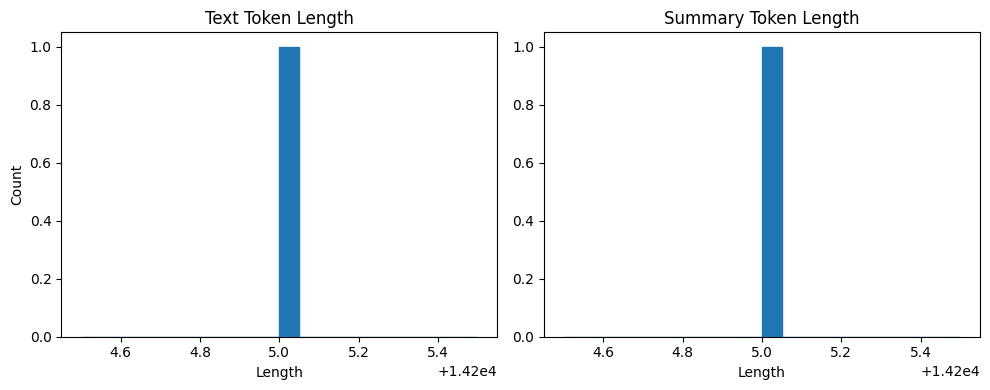

In [ ]:
text_token_len = len([tokenizer.encode(s) for s in train_dataset["text"]])

summary_token_len = len([tokenizer.encode(s) for s in train_dataset["summary"]])


fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(text_token_len, bins = 20, color = 'C0', edgecolor = 'C0' )
axes[0].set_title("Text Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")

axes[1].hist(summary_token_len, bins = 20, color = 'C0', edgecolor = 'C0' )
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

In [ ]:
def convert_examples_to_features(example_batch):
    # max_length 1024 or 512
    input_encodings = tokenizer(example_batch['text'] , max_length = 512, truncation = True, padding="max_length", return_tensors="pt" )

    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch['summary'], max_length = 128, truncation = True )

    return {
        'input_ids' : input_encodings['input_ids'],
        'attention_mask': input_encodings['attention_mask'],
        'labels': target_encodings['input_ids']
    }

In [ ]:
train_dataset_pt = train_dataset.map(convert_examples_to_features, batched = True)

Map:   0%|          | 0/14205 [00:00<?, ? examples/s]

In [ ]:
train_dataset_pt

Dataset({
    features: ['summary', 'text', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 14205
})

In [ ]:
print("\nText:")
print(train_dataset_pt["text"][0])

print("\nSummary:")
print(train_dataset_pt["summary"][0])

print("\nInput_ids:")
print(train_dataset_pt["input_ids"][0])

print("\nAttention_mask:")
print(train_dataset_pt["attention_mask"][0])

print("\nLabels:")
print(train_dataset_pt["labels"][0])


Text:
عدد كبير من المشاركين يخاطر بحياته بحضور هذه القمة ويعد هذا اللقاء أحد أشكال دبلوماسية الظل، بعيدا عن الضغط السياسي وأضواء الإعلام، في محاولة لبحث سبل السلام. وضم الاجتماع مختلف رموز الطيف السوري‘ فترى شيوخ القبائل السنية، وبعضهم له مجموعات مسلحة خاصة به، وكبار الطائفة العلوية من ذوي الصلة الوثيقة بنظام الرئيس بشار الأسد. أو أحد القادة الأكراد الأيزيديين يجلس جنبا إلى جنب مع السفير السوري السابق للمملكة المتحدة. وتجمع حول طاولة الاجتماع أكثر من عشرين من ممثلي العائلات الكبرى والعشائر والمجتمعات المحلية، وبتمثيل لكل الأديان من المسيحيين والأكراد والدروز والسنة والعلويين. نزح حوالي 350 ألف سوري منذ أوائل ديسمبر/كانون الأول الماضي بعد تجدد قصف نظام الأسد للمعارضة المسلحة في إدلب وقد جاء المشاركون الذين يمثلون قادة المجتمع المحلي السوري ليدحضوا وجهة النظر التي تروج لها حكومة الأسد والمعارضة المسلحة عن أنه لا يمكن تجاوز الانقسامات العرقية والدينية. مواضيع قد تهمك نهاية ويعد الكثير من هؤلاء القادة من المقربين للحكومة السورية، وقد وفدوا إلى برلين من دمشق مباشرة، لكنهم لا يدعمون الحكومة

In [ ]:
test_dataset_pt = test_dataset.map(convert_examples_to_features, batched = True)
val_dataset_pt = val_dataset.map(convert_examples_to_features, batched = True)

Map:   0%|          | 0/1777 [00:00<?, ? examples/s]

Map:   0%|          | 0/1775 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
from transformers import TrainingArguments, Trainer
trainer_args = TrainingArguments(
    output_dir='arabert-xlsum', num_train_epochs=20, warmup_steps=500,
    per_device_train_batch_size=8, per_device_eval_batch_size=8,
    weight_decay=0.1, logging_steps=10,
    evaluation_strategy='steps', eval_steps=500, save_steps=1e6,
    gradient_accumulation_steps=16
)

In [ ]:
trainer = Trainer(model=model, args=trainer_args,
                  tokenizer=tokenizer, data_collator=seq2seq_data_collator,
                  train_dataset=train_dataset_pt,
                  eval_dataset=val_dataset_pt)


In [ ]:
trainer.train()

Step,Training Loss,Validation Loss
500,1.141800,2.372205
1000,1.244300,2.332930
1500,1.065200,2.474488
2000,0.999000,2.546692


In [ ]:
dataset_wiki = load_dataset("GEM/wiki_lingua", "ar")

Generating train split:   0%|          | 0/19992 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2859 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5710 [00:00<?, ? examples/s]

DatasetGenerationError: ignored